In [22]:
"""1.使用逻辑回归算法进行分类和预测鸢尾花类别"""
import numpy as np
from numpy import *
import pandas as pd
import csv
from sklearn.model_selection import KFold

"""定义sigmoid函数"""
def sigmoid(inX):
    return 1.0/(1+exp(-inX))

"""以回归系数和特征向量作为输入计算预测的类别"""
def classify(inX,weights):
    prediction = sigmoid(sum(inX * weights))
    if prediction>0.5:
        return 1
    else:
        return 0

"""1.梯度上升法  采用批处理方式更新回归系数值.批处理:一次处理所有数据,回归系数的更新需要遍历整个数据集"""
def GradAscent(dataMatIn,classlabels):
    dataMatrix = mat(dataMatIn)
    labelMatrix = mat(classlabels).transpose()
    m,n = shape(dataMatrix)
    alpha = 0.0001
    maxCycle = 1000 #设置最大循环次数
    weights = ones((n,1))
    for i in range(maxCycle):
        pridiction = sigmoid(dataMatrix * weights)
        error = labelMatrix - pridiction
        weights = weights + alpha * dataMatrix.transpose() * error 
    return weights

'''数据集划分，K折交叉验证'''
def splitdata():
    dataset = pd.read_csv('/Users/fanjiakuan/JupyterProject/data/iris2.csv')
    kf = KFold(n_splits=10)
    for train_index, test_index in kf.split(dataset):
#         print(train_index)
        train = dataset.loc[train_index].values
        test = dataset.loc[test_index].values
    train_x = train[:,0:4]
    train_y = train[:,4]
    test_x = test[:,0:4]
    test_y = test[:,4]
    return train_x,train_y,test_x,test_y
    
"""对训练集和测试集进行处理"""
def dealdata(train_x, train_y, test_x, test_y):
    trainWeights = GradAscent(train_x, train_y)  #计算训练集的梯度
    accCount = 0  #统计分类准确的个数
    numTest = 0 #统计纳入分类统计的总数
    
    """加载测试集,并对每一个加载的数据进行测试分类正确性"""   
    for i in range(len(test_y)):
        numTest = numTest + 1  #每次加载一行,计算参与分类数据+1
        if classify(test_x[i],trainWeights) == test_y[i]:  #判断加载的每一个数据分类是否准确
            accCount = accCount + 1
    accuracy = (float(accCount) / numTest)
    print('accCount:',accCount)
    print('numTest',numTest)
    print('the accuracy is :', accuracy)       

    return accuracy 

if __name__ == '__main__':
    train_x, train_y, test_x, test_y = splitdata()
    dealdata(train_x, train_y, test_x, test_y)


accCount: 9
numTest 10
the accuracy is : 0.9


准确率： 96.0 %


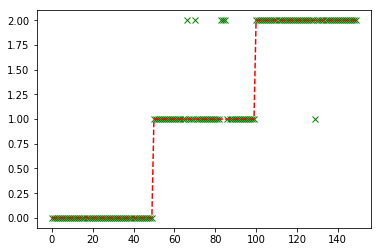

In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model,model_selection
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 导入数据集
iris = datasets.load_iris() 
lg = linear_model.LogisticRegression(multi_class='ovr') # 采用 one-vs-rest 的多分类策略
predicted = model_selection.cross_val_predict(lg, iris.data, iris.target, cv=5) # 5个KFold交叉验证集
# 判断分类正误率
sums = 0
for i in range(len(predicted)):
    if predicted[i] == iris.target[i]:
        sums += 1
print('准确率：',sums * 100.0 / len(predicted),"%")
# 制图
fig, ax = plt.subplots() 
ax.plot(range(len(predicted)), predicted, 'gx', label='Predicted Class')
ax.plot(range(len(iris.target)), iris.target, 'r--', label='True Class')
plt.show()
